# Yolo_Detect/Recog

In [16]:
#Imported libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
from os.path import isfile, join
import re
import pickle
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
#Tensorflows not needed now
#from keras.utils import to_categorical
#from keras.models import Sequential
#from keras.layers import Dense, Flatten, Activation
#from keras.layers import Conv2D, MaxPooling2D
#from keras.layers import Dropout, BatchNormalization
#from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.optimizers import SGD
#from keras.models import load_model
from PIL import Image
import time
from sklearn.model_selection import train_test_split
import cv2
import sys
sys.path.insert(0, 'python/')

from darknet import *
#uncomment and compile in case you don't have the contrib

In [20]:
net = load_net("cfg/cat-dog-yolov3-tiny.cfg".encode("utf-8"), "backup/cat-dog-yolov3-tiny.backup".encode("utf-8"), 0)
meta = load_meta("cfg/cat-dog-obj.data".encode('utf-8'))
r = detect(net, meta, "data/frametest.jpg",thresh = 0.02)
print(r)

[(b'cat', 0.9365425109863281, (853.0330810546875, 185.55606079101562, 224.76878356933594, 198.35299682617188)), (b'cat', 0.676052987575531, (480.634033203125, 166.14764404296875, 197.8695068359375, 211.5458984375)), (b'cat', 0.03818599507212639, (350.36309814453125, 353.2847900390625, 237.3607940673828, 219.287353515625))]


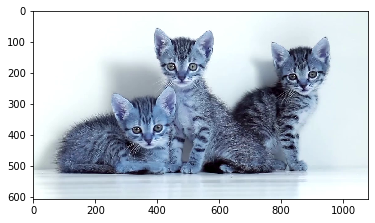

In [2]:
image_dir = 'test_images/cats'
image_filename = 'frametest.jpg'
img = cv2.imread(image_dir+'/'+image_filename)
plt.imshow(img)

In [17]:
model = cv2.face.LBPHFaceRecognizer_create()
model_lbph.read('models/total.xml')

AttributeError: module 'cv2.cv2' has no attribute 'face'

In [45]:
#For testing purpose, not used in video nor live
def detect_Yolo(img,cfg="cfg/cat-dog-yolov3-tiny.cfg".encode("utf-8"), w = "backup/cat-dog-yolov3-tiny.backup".encode("utf-8"),d = "cfg/cat-dog-obj.data".encode('utf-8'), thresh =0.02 ): # images
    net = load_net(cfg, w, 0)
    meta = load_meta(d)
    r = detect(net,meta,'test_images/cats/cute2.jpg')
    R = [j[2] for j in r]
    for (x,y,w,h) in R:
        x,y,w,h = int(x),int(y),int(w),int(h)
        print(x,y,w,h)
        img = cv2.rectangle(img,(x-w//2,y-h//2),(x+w//2,y+h//2),(255,0,0),1)
    cv2.imwrite('test_images/cats/'+'out'+'cute.jpg',img)
detect_Yolo(img)

393 432 950 845


In [9]:
def recog_Yolo(img,model , cfg="cfg/cat-dog-yolov3-tiny.cfg".encode("utf-8"), w = "backup/cat-dog-yolov3-tiny.backup".encode("utf-8"),d = "cfg/cat-dog-obj.data".encode('utf-8'), thresh =0.02): # images
    net = load_net(cfg, w, 0)
    meta = load_meta(d)
    r = detect(net,meta,'test_images/cats/frametest.jpg',thresh = 0.02)
    R = [j[2] for j in r]
    cv2.imwrite('test_images,cats/'+'rout'+'frametest.jpg',img)
    array = [] #Store elements of a tuple: name and a bool that shows pass or not the confidence test

    for fun in R:
        bl = False
        result = model.predict(fun)
        confidence = int(100*(1-(result[1])/arb))
        #print('For'+ str(nb_cat)+' prediction is : '+str(result[0])+'with conf: '+str(confidence))
        if confidence > 90: bl = True
        tmp = result[0],confidence,bl
        array.append(tmp)

    
    for (x,y,w,h) in cats_ext:
        X,Y = x-w//2-10, y-h//2-10
        name,conf,verf = array[cur]
        if verf: 
            img = cv2.putText(frame,str(name)+'conf:'+str(conf),(X,Y), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        else: 
            img = cv2.putText(frame,'DK',(X,Y), cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
        img = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
        
    

In [ ]:
recog_Yolo()